In [1]:
import jax
import jax.numpy as jnp
from flax.linen.initializers import constant, orthogonal
from flax.training.train_state import TrainState
from omegaconf import OmegaConf
import jax
import jax.numpy as jnp
from tests.mer.utils import run_fixed_coparam_setup, run_test_core, probs2params

from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

from data.testing import TESTING_DATA_DIR

rng = jax.random.PRNGKey(30)

payoffs = jnp.array([
    [1,0],
    [0,2]
])
probs = jnp.array([[.60,.40], # should respond with 1
                    [.70,.30]]) # should respond with 0

config = OmegaConf.load(TESTING_DATA_DIR + 'test_mer_ff_normal.yaml')
config = OmegaConf.to_container(config) 

config["ENV_KWARGS"]["payoffs"] = payoffs
    
rng, _rng = jax.random.split(rng, 2)
coparams = probs2params(_rng, probs, config)

config["COPARAMS_SOURCE"] = 'pytree'
config["COPARAMS_BATCH"] = coparams





()
[[3.6305943e-04 9.9963689e-01]
 [6.4262981e-04 9.9935740e-01]]
(2500, 2, 10, 200)


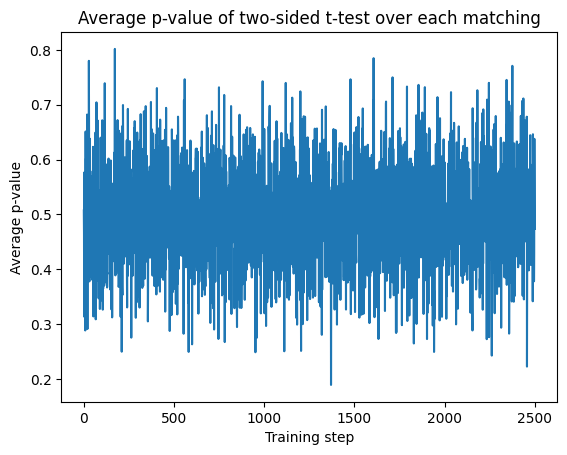

In [2]:

config["NUM_ENVS"] = 200

pis, metrics = run_test_core(rng, config, 1)

for pi in pis:
    print(pi.probs)

ep_returns = metrics["returned_episode_returns"].reshape((-1, config["NUM_STEPS"], config["NUM_PARTICLES"], config['NUM_COPOLICIES'], config["NUM_ENVS"]))
ep_returns_sum = ep_returns.sum(axis=1)
print(ep_returns_sum.shape)
test_results = ttest_ind(ep_returns_sum[:,0,:,:], ep_returns_sum[:,1,:,:], equal_var=False, axis=2, alternative='two-sided')
avg_pvalues = test_results.pvalue.mean(axis=1)
plt.plot(avg_pvalues)
plt.xlabel("Training step")
plt.title("Average p-value of two-sided t-test over each matching")
plt.ylabel("Average p-value")
plt.show()

()
[[9.9999714e-01 2.8065595e-06]
 [9.6461827e-06 9.9999034e-01]]
(1250, 2, 10, 400)


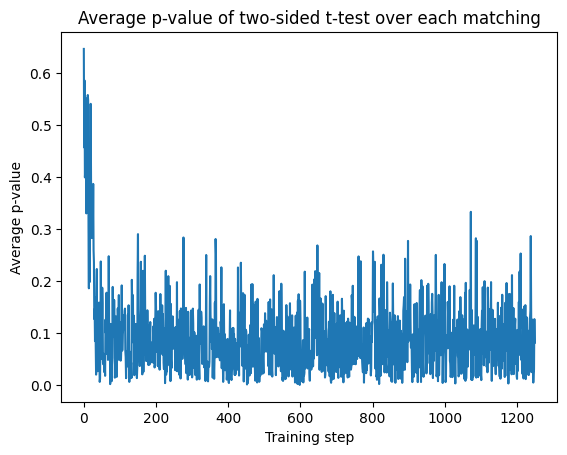

In [3]:
config["NUM_ENVS"] = 400

pis, metrics = run_test_core(rng, config, 1)

for pi in pis:
    print(pi.probs)

ep_returns = metrics["returned_episode_returns"].reshape((-1, config["NUM_STEPS"], config["NUM_PARTICLES"], config['NUM_COPOLICIES'], config["NUM_ENVS"]))
ep_returns_sum = ep_returns.sum(axis=1)
print(ep_returns_sum.shape)
test_results = ttest_ind(ep_returns_sum[:,0,:,:], ep_returns_sum[:,1,:,:], equal_var=False, axis=2, alternative='two-sided')
avg_pvalues = test_results.pvalue.mean(axis=1)
plt.plot(avg_pvalues)
plt.xlabel("Training step")
plt.title("Average p-value of two-sided t-test over each matching")
plt.ylabel("Average p-value")
plt.show()

()
mean
[[0.684 0.701 0.636 0.702 0.719 0.658 0.654 0.673 0.702 0.664]
 [0.677 0.701 0.616 0.714 0.662 0.656 0.679 0.659 0.694 0.646]]
mean
[[0.701 0.711 0.623 0.631 0.646 0.692 0.686 0.702 0.681 0.708]
 [0.693 0.692 0.636 0.632 0.679 0.676 0.689 0.681 0.701 0.711]]
mean
[[0.643 0.694 0.658 0.718 0.624 0.714 0.734 0.622 0.714 0.709]
 [0.63  0.697 0.628 0.725 0.641 0.706 0.708 0.662 0.727 0.716]]
mean
[[0.692 0.687 0.642 0.692 0.666 0.724 0.651 0.696 0.687 0.712]
 [0.677 0.679 0.688 0.736 0.615 0.691 0.647 0.688 0.696 0.688]]
mean
[[0.666 0.716 0.633 0.624 0.646 0.702 0.707 0.729 0.702 0.657]
 [0.623 0.717 0.704 0.631 0.639 0.721 0.73  0.711 0.674 0.634]]
mean
[[0.619 0.761 0.643 0.688 0.704 0.636 0.712 0.639 0.743 0.72 ]
 [0.621 0.722 0.664 0.72  0.725 0.632 0.697 0.632 0.726 0.719]]
mean
[[0.673 0.641 0.706 0.696 0.746 0.736 0.648 0.689 0.744 0.702]
 [0.711 0.652 0.752 0.752 0.734 0.719 0.623 0.734 0.702 0.689]]
mean
[[0.626 0.743 0.674 0.694 0.623 0.738 0.623 0.639 0.759 0.627]
 [0.6

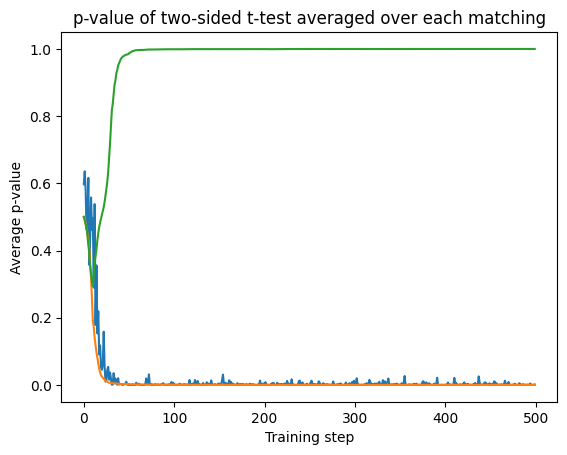

In [10]:
config["NUM_ENVS"] = 1600
config["MATCHING"] = "√"
config["TOTAL_TIMESTEPS"] = 8e5

payoffs = jnp.array([
    [1,0],
    [0,2]
])
probs = jnp.array([[.60,.40], # should respond with 1
                    [.70,.30]]) # should respond with 0

config["ENV_KWARGS"]["payoffs"] = payoffs
rng, _rng = jax.random.split(rng, 2)
coparams = probs2params(_rng, probs, config)

config["COPARAMS_SOURCE"] = 'pytree'
config["COPARAMS_BATCH"] = coparams

pis, metrics = run_test_core(rng, config, 1)

for pi in pis:
    print(pi.probs)

ep_returns = metrics["returned_episode_returns"].reshape((-1, config["NUM_STEPS"], config["NUM_PARTICLES"], config['NUM_COPOLICIES'], config["NUM_ENVS"]))
ep_returns_sum = ep_returns.sum(axis=1)
test_results = ttest_ind(ep_returns_sum[:,0,:,:], ep_returns_sum[:,1,:,:], equal_var=False, axis=2, alternative='two-sided')
avg_pvalues = test_results.pvalue.mean(axis=1)

pi = metrics["action_probs"]
pi = pi.reshape((-1, config["NUM_STEPS"], config["NUM_PARTICLES"], config['NUM_COPOLICIES'], config["NUM_ENVS"], 2))
action_seq = pi[:,0,:,0,0,:].squeeze()

plt.plot(avg_pvalues)
plt.plot(action_seq[:,0,0])
plt.plot(action_seq[:,1,0])
plt.xlabel("Training step")
plt.title("p-value of two-sided t-test averaged over each matching")
plt.ylabel("Average p-value")
plt.show()

()
mean
[[-0.507 -0.431 -0.536 -0.482 -0.546 -0.454 -0.462 -0.447 -0.403 -0.57 ]
 [-0.453 -0.429 -0.54  -0.462 -0.548 -0.444 -0.462 -0.467 -0.441 -0.554]
 [-0.419 -0.431 -0.575 -0.481 -0.578 -0.464 -0.437 -0.433 -0.437 -0.534]]
mean
[[-0.572 -0.403 -0.456 -0.414 -0.546 -0.547 -0.439 -0.522 -0.454 -0.451]
 [-0.537 -0.469 -0.447 -0.407 -0.548 -0.569 -0.422 -0.524 -0.378 -0.412]
 [-0.537 -0.401 -0.429 -0.429 -0.514 -0.523 -0.452 -0.52  -0.427 -0.428]]
mean
[[-0.536 -0.398 -0.405 -0.411 -0.42  -0.397 -0.378 -0.359 -0.419 -0.396]
 [-0.504 -0.384 -0.403 -0.381 -0.414 -0.383 -0.421 -0.365 -0.395 -0.382]
 [-0.499 -0.401 -0.403 -0.395 -0.376 -0.376 -0.386 -0.419 -0.391 -0.366]]
mean
[[-0.365 -0.425 -0.369 -0.371 -0.388 -0.384 -0.314 -0.401 -0.394 -0.379]
 [-0.368 -0.367 -0.381 -0.332 -0.391 -0.361 -0.354 -0.373 -0.339 -0.349]
 [-0.373 -0.367 -0.351 -0.384 -0.312 -0.332 -0.382 -0.347 -0.373 -0.38 ]]
mean
[[-0.478 -0.34  -0.379 -0.484 -0.349 -0.353 -0.322 -0.344 -0.478 -0.336]
 [-0.424 -0.34  -0.

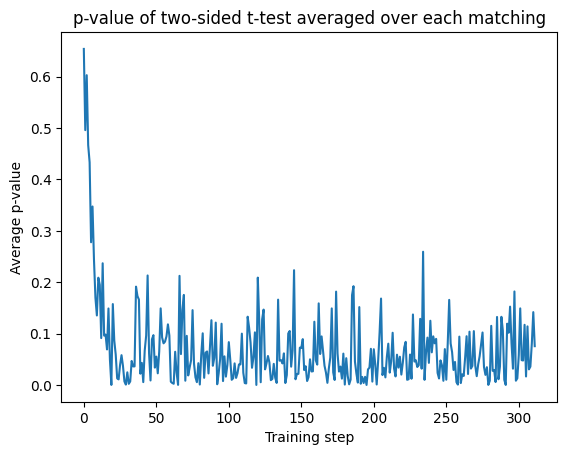

In [7]:
jnp.set_printoptions(precision=3, suppress=True)

rng = jax.random.PRNGKey(30)

payoffs = jnp.array([
    [ 2, 0, 0,-1,-1,-1,-1,-1,-1],
    [ 0, 2, 0,-1,-1,-1,-1,-1,-1],
    [ 0, 0, 1,-1,-1,-1,-1,-1,-1]
])
probs = jnp.array([[.98,.01,.01],
                    [.01,.98,.01],
                    [.01,.01,.98]])

config = OmegaConf.load(TESTING_DATA_DIR + 'test_mer_ff_normal.yaml')
config = OmegaConf.to_container(config) 

config["ENV_KWARGS"]["payoffs"] = payoffs
    
rng, _rng = jax.random.split(rng, 2)
coparams = probs2params(_rng, probs, config)

config["COPARAMS_SOURCE"] = 'pytree'
config["COPARAMS_BATCH"] = coparams

config["MATCHING"] = "averaged_otherwise_every"
config["NUM_PARTICLES"] = 3

pis, metrics = run_test_core(rng, config, 1)

for pi in pis:
    print(pi.probs)

ep_returns = metrics["returned_episode_returns"].reshape((-1, config["NUM_STEPS"], config["NUM_PARTICLES"], config['NUM_COPOLICIES'], config["NUM_ENVS"]))
ep_returns_sum = ep_returns.sum(axis=1)
test_results = ttest_ind(ep_returns_sum[:,0,:,:], ep_returns_sum[:,1,:,:], equal_var=False, axis=2, alternative='two-sided')
avg_pvalues = test_results.pvalue.mean(axis=1)

pi = metrics["action_probs"]
pi = pi.reshape((-1, config["NUM_STEPS"], config["NUM_PARTICLES"], config['NUM_COPOLICIES'], config["NUM_ENVS"], 2))
action_seq = pi[:,0,:,0,0,:].squeeze()

plt.plot(avg_pvalues)
# plt.plot(action_seq[:,0,0])
# plt.plot(action_seq[:,1,0])
plt.xlabel("Training step")
plt.title("p-value of two-sided t-test averaged over each matching")
plt.ylabel("Average p-value")
plt.show()